# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças Cardiovasculares geralmente são eventos agudos causados principalmente por um bloqueio que impede que o sangue flua para o coração ou para o cérebro.

A razão mais comum para isso é o acúmulo de depósitos de gordura nas paredes internas dos vasos sanguíneos que irrigam o coração ou o cérebro. Os acidentes vasculares cerebrais também podem ser causados por uma hemorragia em vasos sanguíneos do cérebro ou a partir de coágulos de sangue. 

A causa de ataques cardíacos e AVCs geralmente são uma combinação de fatores de risco, como o uso de tabaco, dietas inadequadas e obesidade, sedentarismo e o uso nocivo do álcool, hipertensão, diabetes e hiperlipidemia.

<center><img src="https://github.com/mazzidougs/HeartDisease/blob/main/jesse-orrico-Us3AQvyOP-o-unsplash%20(1).jpg?raw=true"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no estilo de vida.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Podemos ressaltar que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/mazzidougs/HeartDisease/main/dataset).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://raw.githubusercontent.com/mazzidougs/HeartDisease/main/heart-diseases.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/mazzidougs/HeartDisease/main/dataset_amount).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depressão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - Teste de estresse cardíaco
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/mazzidougs/HeartDisease/main/dataset"
dataset_brasil = "https://raw.githubusercontent.com/mazzidougs/HeartDisease/main/dataset_amount"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [ ]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [ ]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [ ]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

# Análise exploratória

Esta é uma etapa muito importante de nosso processo para nos situarmos em relação ao dataset que iremos trabalhar, aqui veremos o tamanho de nosso df, uma descrição estatística, tipos de nossas variáveis, verificaremos quantas pessoas possuem doença ou não dado o df, contaremos os valores ausentes e plotaremos alguns gráficos.
  

Verificando o tamanho de nosso dataframe:


In [ ]:
df.shape

(303, 14)

Descrição estatística:

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Tipos dos atributos

In [ ]:
#Para vermos os tipos de nossas variáveis, utilizamos o dtypes

df.dtypes

#podemos verificar que a maioria são do tipo float e apenas a váriavel num é do tipo inteiro
#depois de mostrarmos nosso df, vemos que a váriavel "num" é binária, portanto assume o valor de 0 ou 1

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [ ]:
#Verificando as 5 primeiras entradas com head. Se colocarmos um parâmetro dentro dos parênteses, escolhemos a quantidade de itens a ser mostrados
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
#A nossa variável num diz respeito a quais pessoas possuem doença cardíaca ou não, podemos contar esses valores com value_counts

df.num.value_counts()

#após executarmos, observamos que 164 pessoas não possuem doenças cardíacas e 139 pessoas possuem

0    164
1    139
Name: num, dtype: int64

Agora faremos uma etapa muito importante para a análise de nossos dados, verificaremos quais valores de nosso df são ausentes, para isso, usaremos o isnull.

In [ ]:
df.isnull().sum()

#adicionei o sum para a visualização dos valores ausentes ficar mais simples
#depois de rodarmos a célula, podemos verificar que não possuimos valores ausentes em nosso df, o que é muito bom!

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

##Plotando gráficos

Gráfico de linha para df_brasil:

26.053166858092357




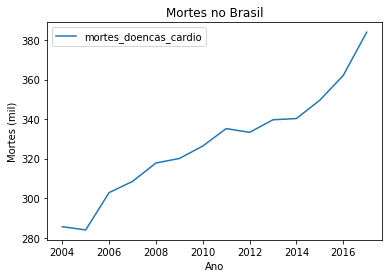

In [ ]:
df_brasil.plot('ano', 'mortes_doencas_cardio', kind='line', xlabel='Ano', title='Mortes no Brasil', ylabel='Mortes (mil)')

max_value = df_brasil.mortes_doencas_cardio.max()
min_value = df_brasil.mortes_doencas_cardio.min()

growth_rate = (max_value - min_value)/(max_value/100)
print(growth_rate)
print('\n')

Após plotarmos o gráfico, notamos uma alta de 100.000 mortes no período de 2004 a 2016 e também uma taxa de crescimento de `26.05%` do ano de 2004 ao ano de 2017. 


Gênero dos pacientes:

0 - Mulher;

1 - Homem;

Em relação à gênero, 206 pacientes são homens e 97 são mulheres. Vamos plotar um gráfico para visualizarmos a diferença.



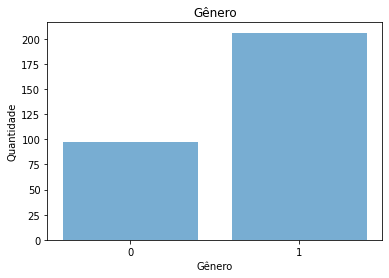

In [ ]:
x = df.sex.value_counts().index #aqui definimos os valores presentes no atríbuto 'sex' como indíce
y = df.sex.value_counts().values #aqui definimos os valores presentes no atríbuto 'sex' com os valores presentes no df.sex

fig, ax = plt.subplots()                       
ax.bar(x, y, align='center', alpha=0.6)         
ax.set_xticks(x)                               
ax.set_xlabel('Gênero')                        
ax.set_ylabel('Quantidade')                    
ax.set_title('Gênero')                         
plt.show()                                     

Vamos ver a quantidade de homens e mulheres que possuem e não possuem doença cardiovascular.



In [ ]:
((df["sex"] == 0) & (df["num"] == 0)).value_counts() 
# 72 pacientes são mulheres e não possuem doença cardíaca

False    231
True      72
dtype: int64

In [ ]:
((df["sex"] == 0) & (df["num"] == 1)).value_counts() 
# 25 pacientes são mulheres e possuem doença cardíaca

False    278
True      25
dtype: int64

In [ ]:
((df["sex"] == 1) & (df["num"] == 0)).value_counts() 
# 92 pacientes são homens e não possuem doença cardíaca

False    211
True      92
dtype: int64

In [ ]:
((df["sex"] == 1) & (df["num"] == 1)).value_counts() 
# 114 pacientes são homens e possuem doença cardíaca

False    189
True     114
dtype: int64

Armazenando a quantidade de homens e mulheres em variáveis para efetuarmos o cálculo de porcentagem. 

In [ ]:
women_amount = (df.sex == 0).sum()
women_amount_d = ((df["sex"] == 0) & (df["num"] == 1)).sum()

men_amount = (df.sex == 1).sum()
men_amount_d = ((df["sex"] == 1) & (df["num"] == 1)).sum()

Aqui é calculada a porcentagem de homens e mulheres com doença cardiovascular.

In [ ]:
perc_women = (100*women_amount_d)/women_amount
print(perc_women)

perc_men = (100*men_amount_d)/men_amount
print(perc_men)

25.77319587628866
55.33980582524272


* Mulheres sem doença cardíaca: `72` 
* Mulheres com doença cardíaca: `25`

* Homens sem doença cardíaca: `92`
* Homens com doença cardíaca: `114`


Após realizarmos essa análise, notamos que `25.77%` das mulheres  e `55.33%` dos homens possuem doença.

Aqui vamos visualizar as correlações entre as variáveis e salvar na variável `corr`, seguindo a análise vamos plotar um mapa de calor para visualizarmos de maneira mais intuitiva e teremos uma explicação mais detalhada.

In [ ]:
corr = df.corr(method='pearson')
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.424510


####Gráfico de dispersão:

Este é importante para vermos correlações entre as variáveis em uma forma gráfica, temos 3 tipos de correlações: `postiva`, `negativa` e `nula`.

Quando temos a `positiva`, vemos que a variável independente aumenta e a dependente também. A `negativa` se dá pela diminuição da independente e consequentemente da dependente. Já a `nula`, não ocorre nem aumento e nem diminuição, portanto há uma dispersão entre os pontos e isso significa que não há correlação aparente entre as variáveis.

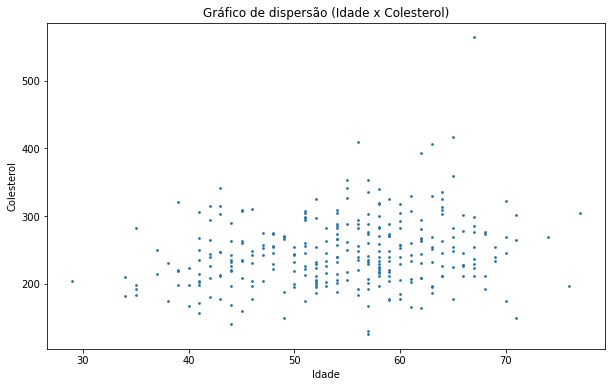

In [ ]:
#grafico de dispersão entre age e chol

fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter('age', 'chol', data=df, s=3, alpha=1)
ax.set_xlabel('Idade')
ax.set_ylabel('Colesterol')
ax.set_title('Gráfico de dispersão (Idade x Colesterol)');

Neste plot, vemos uma correlação nula, podemos notar uma concentração de pacientes com nível de colesterol um pouco mais evidenciada entre as idades 50-60, mas isso não significa que os níveis de colesterol nesta idade sejam superiores ou inferiores aos dos demais.

###Histograma de nível de colesterol



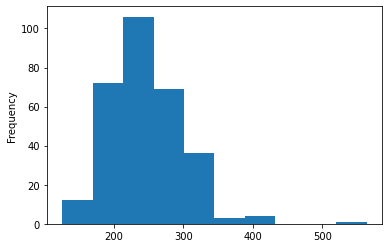

In [ ]:
df.chol.plot(kind='hist');

Ao vermos este gráfico, notamos uma concentração de pacientes contendo níveis entre 200-300 (mg/dL - miligramas por decilitro). Para referência, um nível de colesterol interessante para o ser o humano seria menor que 200 mg/dL.

###Plotando heatmap de correlação:


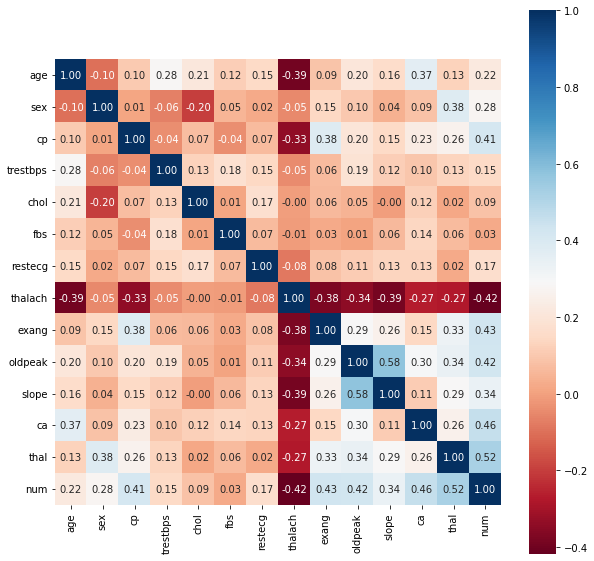

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(corr, cmap='RdBu', fmt='.2f', 
            square=True, linecolor='white', annot=True, ax=ax);

Após plotarmos o `heatmap`, não vemos uma correlação significativa.

`thal:` teste de estresse cardíaco;

`num:` pessoas que possuem ou não doença cardiovascular;

`oldpeak:` depressão do segmento ST induzida pelo exercício em relação ao repouso;

`thelach:` máximo batimento cardíaco atingido.


Em `thal` e `num`, vemos um coeficiente de correlação `r = 0.52`, onde este valor é moderado, portanto não se afetam significativamente.

Em `oldpeak` e `num` o coeficiente de correlação `r = 0.58`, no qual este valor é um pouco maior que o anterior, mas ainda moderado.

É interessante notar que o atributo `thelach`, possui uma correlação negativa moderada em relação ao atributo `num`, em que `r = -0,42`. 

# Implementação do modelo

Neste passo, iniciaremos a construir um modelo para classificarmos se um paciente possui doença cardíaca ou não.

In [ ]:
# importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn import preprocessing
# instanciando e e escolhendo os hyperparameters
lr_model = LogisticRegression()

# criando x e y
x = df.drop('num', axis=1)
y = df.num

# dividindo o dataset entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

# padronizar os dados de treino
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

# fit do modelo (treinar)
lr_model.fit(x_train, y_train)

# padronizar os dados de teste
x_test = scaler.transform(x_test)

# fazer previsões
y_pred = lr_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        38
           1       0.94      0.79      0.86        38

    accuracy                           0.87        76
   macro avg       0.88      0.87      0.87        76
weighted avg       0.88      0.87      0.87        76



Text(51.0, 0.5, 'Prediction')

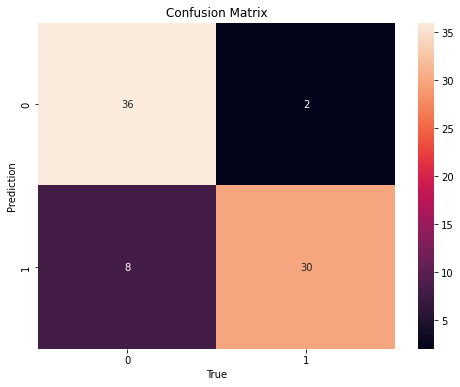

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('True')
ax.set_ylabel('Prediction')

## Conclusão:

Após analisarmos este dataset, observamos uma quantidade maior de homens que possuem doenças do que mulheres, por mais de termos mais homens na pesquisa, 25% das mulheres possuem a doença e 55% dos homens também possuem. Buscamos validar alguma correlação importante em relação à possuir ou não uma doença cardíaca, obtemos apenas correlações moderadas e não significativas.

Uma questão importante, também dita no inicio, seria adotar algumas medidas e mudanças no estilo de vida, pois é estimado que 90% das doenças cardiovasculares poderiam ser evitadas por isso.

Na construção do modelo, observamos pouco erro do y de teste em relação ao y previsto. Em um próximo projeto, utilizaremos o xgboost para predizer nossa variável alvo.